# Hi! This is Alejandro Barcala, data scientist professional. Thank you so much for taking the time to check some of my working scripts

# Now we are going to work with NLP (neuro linguistic programming), meaning predicting values of correct or incorrect outcomes based on written data extracts instead of performing with a numeric nature problem. We used movie reviews by consumers and tried to predict if it was a negative or a positive review and check our performance while doing so.

Number of rows: 50000
Number of columns: 2


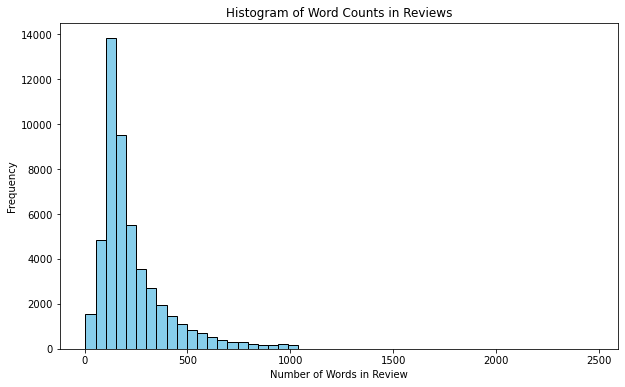


Percentage of Positive and Negative Sentiments:
positive    50.0
negative    50.0
Name: sentiment, dtype: float64


ValueError: min() arg is an empty sequence

<Figure size 576x432 with 0 Axes>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (Replace with actual IMDb dataset)
# Assuming the dataset is a CSV with 'review' and 'sentiment' columns
data = pd.read_csv("C:/Users/Alejandro/Downloads/git.kaggle/movie rating IMDB/IMDB Dataset.csv")
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (Replace with actual IMDb dataset)
# Assuming the dataset is a CSV with 'review' and 'sentiment' columns
data = pd.read_csv("C:/Users/Alejandro/Downloads/git.kaggle/movie rating IMDB/IMDB Dataset.csv")

# Convert to DataFrame and show basic info
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Calculate the number of words in each review
data['word_count'] = data['review'].apply(lambda x: len(str(x).split()))

# Plot a histogram of the word counts
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in Reviews')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

# Calculate the percentage of positive and negative sentiments
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
print("\nPercentage of Positive and Negative Sentiments:")
print(sentiment_counts)

# If the 'sentiment' column has values like 0 (negative) and 1 (positive):
sentiment_labels = {0: 'Negative', 1: 'Positive'}
data['sentiment_label'] = data['sentiment'].map(sentiment_labels)

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Convert to DataFrame and show basic info
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Calculate the number of words in each review
data['word_count'] = data['review'].apply(lambda x: len(str(x).split()))

# Plot a histogram of the word counts
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in Reviews')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

# Calculate the percentage of positive and negative sentiments
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
print("\nPercentage of Positive and Negative Sentiments:")
print(sentiment_counts)

# If the 'sentiment' column has values like 0 (negative) and 1 (positive):
sentiment_labels = {0: 'Negative', 1: 'Positive'}
data['sentiment_label'] = data['sentiment'].map(sentiment_labels)

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



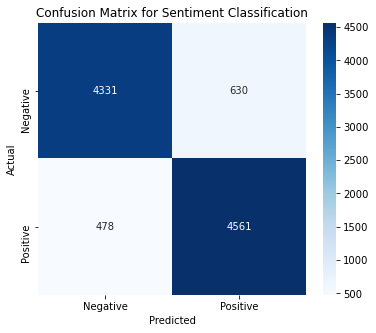

Accuracy: 0.8892
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



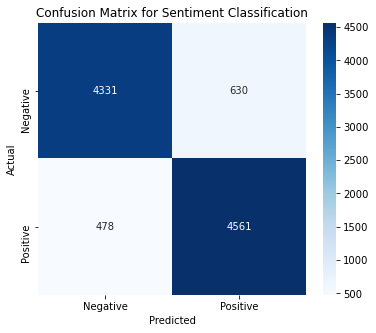

Accuracy: 0.8892


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Assuming 'movie_reviews.csv' has 'review' and 'sentiment' columns)
data = pd.read_csv("C:/Users/Alejandro/Downloads/git.kaggle/movie rating IMDB/IMDB Dataset.csv")

# Check if 'sentiment' column is binary, if not we can create it (0 for negative, 1 for positive)
# Assuming 'sentiment' is already a binary column (0 - negative, 1 - positive)

# Preprocess the text (if not already done)
data['review'] = data['review'].str.lower()  # Convert to lowercase

# Split the data into train and test sets
X = data['review']  # Features (the reviews)
y = data['sentiment']  # Target (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model (you can also try other models such as RandomForestClassifier)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Sentiment Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = model.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy:.4f}')


# Check if 'sentiment' column is binary, if not we can create it (0 for negative, 1 for positive)
# Assuming 'sentiment' is already a binary column (0 - negative, 1 - positive)

# Preprocess the text (if not already done)
data['review'] = data['review'].str.lower()  # Convert to lowercase

# Split the data into train and test sets
X = data['review']  # Features (the reviews)
y = data['sentiment']  # Target (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model (you can also try other models such as RandomForestClassifier)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Sentiment Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = model.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy:.4f}')


We got a very decent result for text classification for movie reviews using 50.000 different movies reviews from a dataset extracted from IMDB of 89% by a logistic regression model. 

Well done!!